In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
with open('/home/kolegor/Code/VAS/data/nn_data/_train.txt', 'r') as inf:
    X = []
    Y = []
    for i, line in enumerate(inf):
        if i > 0:
            tokens = line.split(',')
            X.append(map(float, tokens[1].split(' ')[:-1]))
            Y.append(int(tokens[0]))

In [3]:
results = []

for i in xrange(10):
    print i
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42 * i + 1)
    clf = RandomForestClassifier(n_estimators=299)
    clf.fit(X_train, y_train)
    results.append(cross_val_score(clf, X_test, y_test, cv=5))

0
1
2
3
4
5
6
7
8
9


In [4]:
for a in results:
    print a

[ 1.          1.          0.98795181  1.          0.98765432]
[ 1.          1.          0.98780488  1.          1.        ]
[ 1.          1.          1.          1.          0.98765432]
[ 1.          1.          0.98780488  0.98780488  1.        ]
[ 1.          1.          1.          1.          0.98780488]
[ 0.98795181  0.98780488  1.          1.          1.        ]
[ 1.          0.98780488  0.98780488  0.98780488  0.98780488]
[ 1.          1.          1.          0.98780488  1.        ]
[ 1.          1.          0.97560976  1.          1.        ]
[ 1.  1.  1.  1.  1.]


In [5]:
qwe = zip(range(len(clf.feature_importances_)), clf.feature_importances_)
qwe = sorted(qwe, key=lambda x: x[1], reverse=True)

for a in qwe:
    print a

(7, 0.1782081156136289)
(37, 0.16743830823000583)
(12, 0.12089372711743315)
(6, 0.10770715457556815)
(10, 0.10610099168800816)
(20, 0.040088921219237031)
(14, 0.03541751181648798)
(29, 0.031218791734679351)
(30, 0.023354213657110441)
(11, 0.019750232679755446)
(22, 0.014668091444848336)
(16, 0.012884036378279378)
(0, 0.010864405510544569)
(38, 0.0096864500064065186)
(17, 0.009396670910063425)
(23, 0.0089808665600597005)
(15, 0.0089307704274190925)
(24, 0.0084497971682468646)
(19, 0.0079809372199770318)
(35, 0.0074073322622113351)
(36, 0.0065259770684112936)
(4, 0.0057044833115656307)
(18, 0.0056427860600243391)
(8, 0.0055063137409569638)
(21, 0.0054726972620428322)
(33, 0.0053643380979553424)
(26, 0.0050764059325550982)
(9, 0.0042651019896914636)
(34, 0.0042423208837079323)
(27, 0.0039997537004737771)
(1, 0.003607543775080557)
(32, 0.0031892670240429946)
(2, 0.0025820177378617481)
(25, 0.0024210187494569718)
(13, 0.0023454230603838278)
(28, 0.0015394713959075669)
(5, 0.0011654413970433

### silence

In [1]:
import pyaudio
import wave
import sys
import ctypes
import struct
import scipy.io.wavfile as wav
import numpy as np
from time import sleep
from collections import Counter

In [7]:
class AudioFile:
    chunk = 44100

    def __init__(self, file):
        """ Init audio stream """ 
        self.wf = wave.open(file, 'rb')
        self.p = pyaudio.PyAudio()
        self.stream = self.p.open(
            format = self.p.get_format_from_width(self.wf.getsampwidth()),
            channels = self.wf.getnchannels(),
            rate = self.wf.getframerate(),
            output = True
        )

    def play(self):
        """ Play entire file """
        data = self.wf.readframes(self.chunk)
        
        amplitude_threshold = 1000
        counter_threshold = 35000
        
        while data != '':
            amplitudes = map(lambda x: ctypes.c_ubyte(ord(x)).value, data)
            amplitudes = [struct.unpack("h", bytearray([a, b]))[0] for a, b in zip(amplitudes[:-1:2], amplitudes[1::2])]
            count_lower, count_upper = 0, 0
            
            for a in amplitudes:
                if abs(a) < amplitude_threshold:
                    count_lower += 1
                else:
                    count_upper += 1
            
            # self.stream.write(data)
            data = self.wf.readframes(self.chunk)
            # print count_lower, count_upper, 'silence' if count_lower >= counter_threshold else 'voice'
            # sleep(3)
            print 'silence' if count_lower >= counter_threshold else 'voice'
            

    def close(self):
        """ Graceful shutdown """ 
        self.stream.close()
        self.p.terminate()
    

def util(path):
    (rate,sig) = wav.read(path)
    counter = Counter()
    for a in sig:
        counter[a] += 1
    return counter
    # wav.write(path_to_save, rate, sig)
    
    
def one_by_one(path, path_to_save):
    (rate,sig) = wav.read(path)
    batch_size = 44100
    for i in xrange(2): # len(sig) / 44100):
        temp_sig = sig[i * batch_size : (i + 1) * batch_size]
        wav.write(path_to_save, rate, temp_sig)
        
        sleep(2)
        print len(temp_sig), np.mean(temp_sig), np.mean(np.abs(temp_sig))
        a = AudioFile(path_to_save)
        a.play()
        a.close()

In [8]:
audio = AudioFile('/home/kolegor/Code/VAS/data/wav_files/wav_my_voice/1.wav')
audio.play()

voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
silence
voice
voice
voice
voice
voice
voice
silence
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
silence
voice
voice
silence
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice
voice


KeyboardInterrupt: 

In [152]:
read_file = '/home/kolegor/Denis big.wav'
temp_file = '/home/kolegor/Ilya__.wav'
counter = util(read_file)

In [167]:
one_by_one(read_file, temp_file)

44100 13.9794104308 537.016326531
44100 -19.5114965986 961.780249433


In [170]:
(rate,sig) = wav.read(read_file)

size = 30000
qwe1 = sig[:size]
qwe2 = sig[size:2*size]

threshold = 700
print len([a for a in qwe1 if abs(a) < threshold]) / float(len(qwe1))
print len([a for a in qwe2 if abs(a) < threshold]) / float(len(qwe2))

0.9169
0.6106


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
%matplotlib inline

def plot(path):
    spf = wave.open(path, 'r')

    #Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, 'Int16')


    #If Stereo
    if spf.getnchannels() == 2:
        print 'Just mono files'
        sys.exit(0)

    plt.figure(1)
    plt.title('Signal Wave...')
    plt.plot(signal[:88200])
    print signal[:10]
    plt.show()

[-305 -267 -305 -248 -401 -191 -344   38   19  172]


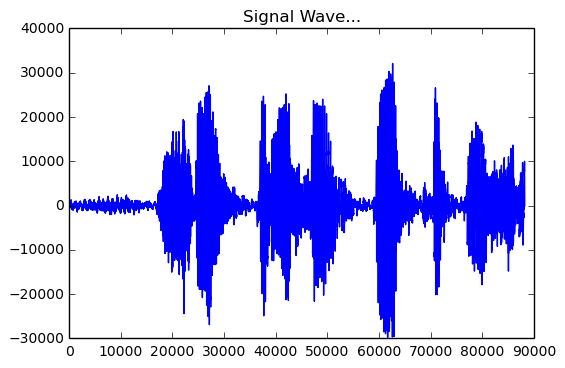

In [28]:
plot('/home/kolegor/Downloads/Egor_1_converted.wav')